In [1]:
!pwd

/Users/smust4/Downloads/cps_g3_spend_pull


In [1]:
import numpy as np
import os
os.chdir('/axp/rim/mldsml/dev/Shaique')
os.getcwd()
import pandas as pd
#from datetime import datetime
import numpy as np 

In [20]:
df = pd.read_csv("movie_review_data copy.csv")

In [21]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# data treatment

In [22]:
#first we have. to solve for the categorical variables, we will convert them into numeric one by i
#mputing with the target variables mean 


In [23]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [24]:
df.drop("movie_imdb_link",axis=1,inplace=True)

In [25]:
for x in df.columns:
    if df[x].dtype == "object":
        m = df[x].mode()[0]
        
        df[x].fillna((m),inplace=True)
    else:
        m=df[x].mean()
        df[x].fillna(m,inplace=True)

In [26]:
df["num_voted_users"].mean()

83668.16081697402

In [27]:
#breaking into dev and OOT 
dev = df[:4000]
oot = df[4000:5043]

In [28]:
def categorical_treator(col,dev_data,replace_data):
    value_dict={}
    j=list(dev_data[col].unique())
    for vals in j:
        print(vals)
        df2=dev_data[dev_data[col]==vals]
        m=df2.imdb_score.mean()
        value_dict.update({vals :m} )
    replace_data=replace_data.replace({col: value_dict})    
    return replace_data
#this fucntion take the columsn to be replaced the dev data and the data with which we have to do the transformation
#we will use replace dev data with means from dev data and for OOT data also we will use mean from dev data

In [ ]:
oot=categorical_treator("color",dev,oot)
oot=categorical_treator("director_name",dev,oot)
oot=categorical_treator("actor_2_name",dev,oot)
oot=categorical_treator("genres",dev,oot)
oot=categorical_treator("actor_1_name",dev,oot)
oot=categorical_treator("movie_title",dev,oot)
oot=categorical_treator("actor_3_name",dev,oot)
oot=categorical_treator("plot_keywords",dev,oot)
oot=categorical_treator("language",dev,oot)
oot=categorical_treator("country",dev,oot)
oot=categorical_treator("title_year",dev,oot)
oot=categorical_treator("content_rating",dev,oot)


In [ ]:
dev=categorical_treator("color",dev,dev)
dev=categorical_treator("director_name",dev,dev)
dev=categorical_treator("actor_2_name",dev,dev)
dev=categorical_treator("genres",dev,dev)
dev=categorical_treator("actor_1_name",dev,dev)
dev=categorical_treator("movie_title",dev,dev)
dev=categorical_treator("actor_3_name",dev,dev)
dev=categorical_treator("plot_keywords",dev,dev)
dev=categorical_treator("language",dev,dev)
dev=categorical_treator("country",dev,dev)
dev=categorical_treator("title_year",dev,dev)
dev=categorical_treator("content_rating",dev,dev)

# variable Selection 

In [ ]:
#creating buckets of dependent variable for feature slection 

In [92]:
dev2 = dev.copy()
dev2.loc[(dev2["imdb_score"]>5),"imdb_bucket"]=1
dev2.loc[(dev2["imdb_score"]<5),"imdb_bucket"]=0
dev2.drop("imdb_score",axis=1,inplace=True)

In [95]:
dev2.fillna(0,inplace=True)

[1.35792769e-04 5.74599128e-02 1.02341273e-02 6.38826925e-03
 4.95647070e-03 6.32554759e-03 8.98300637e-02 4.94803493e-03
 4.68779445e-03 3.24240819e-02 7.77627117e-02 2.78498683e-01
 6.03631229e-03 4.12534004e-03 7.34116882e-02 4.76337764e-03
 2.95392341e-01 6.78975405e-03 3.31823470e-04 5.59091095e-03
 5.46251866e-03 5.34124742e-03 5.19687624e-03 5.61568421e-03
 2.30694108e-03 5.98369425e-03]


/Users/smust4/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


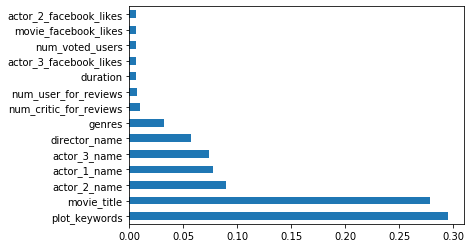

In [96]:
X = dev2.drop("imdb_bucket",axis=1)  #independent columns
y = dev2["imdb_bucket"]   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [14]:
dev.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

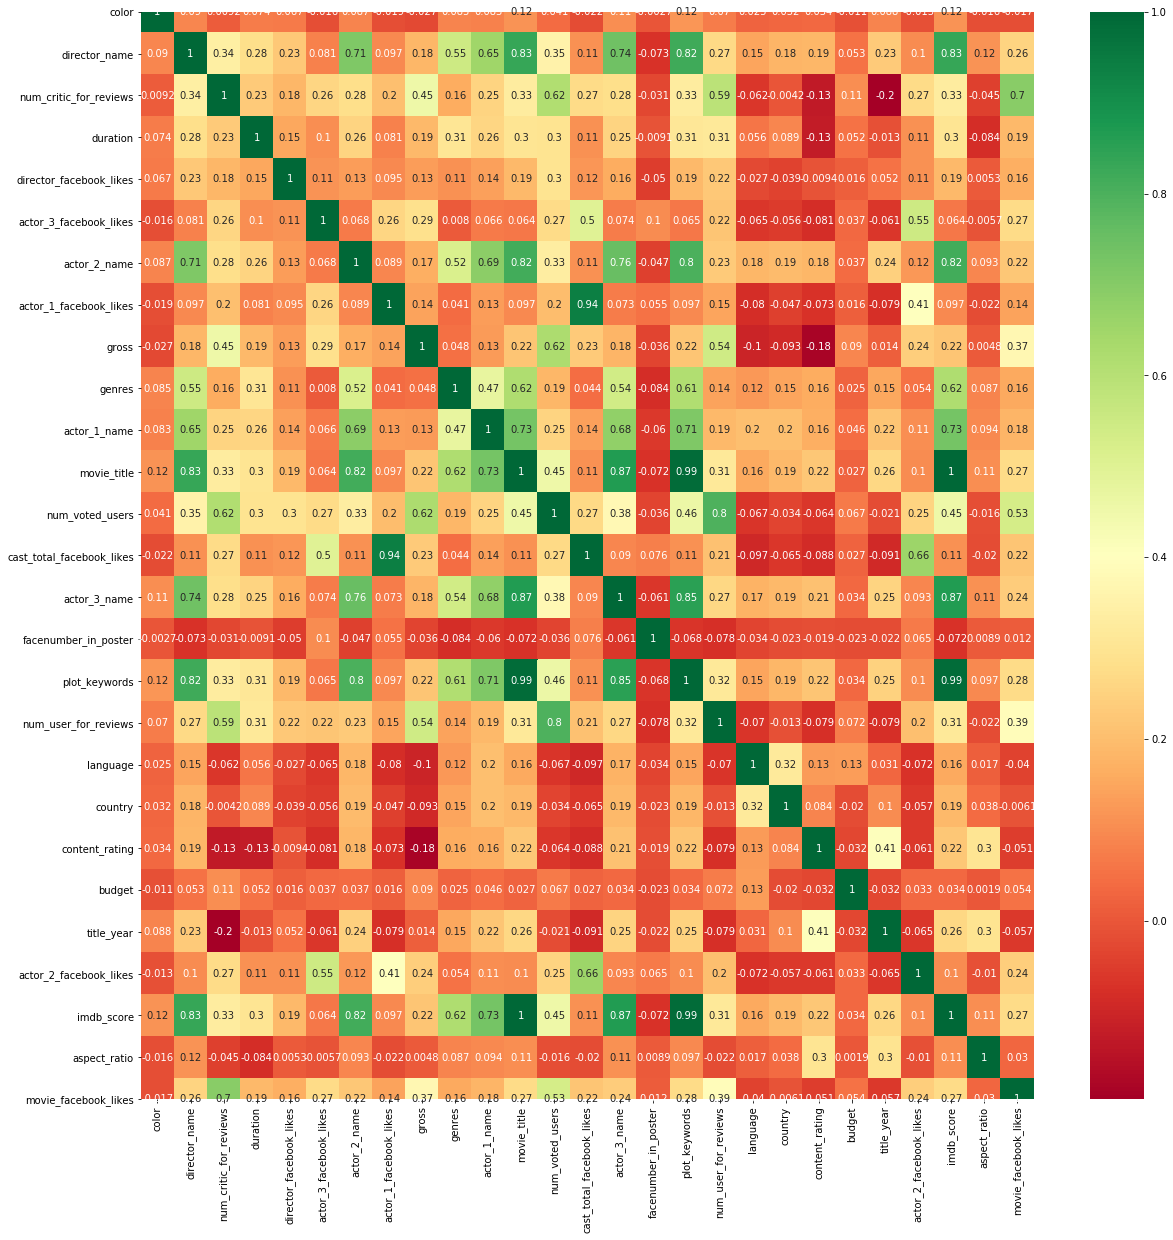

In [99]:
import seaborn as sns
X = dev.drop("imdb_score",axis=1)  #independent columns
y = dev["imdb_score"]
corrmat = dev.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dev[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Training the Model 

In [16]:
#Selcting the features based on the last two analysis
dev =dev[['director_name', 'num_critic_for_reviews',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes','genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'actor_2_facebook_likes', 'imdb_score','movie_facebook_likes']]

In [49]:

y = pd.DataFrame(dev["imdb_score"])

h=pd.DataFrame(dev.drop('imdb_score', axis=1))


import xgboost as xgb
print(xgb.__version__)

dtrain = xgb.DMatrix(h, label=y)

param = {
    'max_depth': 5,  
    'learning_rate': .1,  
    'objective':'reg:linear',
    'min_child_weight':100,
    'tree_method':'exact'
    
}



model = xgb.train(param, dtrain,num_boost_round=1000)

filename = 'Model_razorpay'
pickle.dump(model, open(filename, 'wb'))

0.90
[00:51:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#prediction

In [50]:
dev =dev[['director_name', 'num_critic_for_reviews',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes','genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'actor_2_facebook_likes', 'imdb_score','movie_facebook_likes']]



y = pd.DataFrame(oot["imdb_score"])

h=pd.DataFrame(oot.drop('imdb_score', axis=1))

import xgboost as xgb
print(xgb.__version__)

dtest = xgb.DMatrix(h, label=y)

filename = 'Model_razorpay'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred = loaded_model.predict(dtest,pred_leaf=False)

a = list(y_pred)


t=pd.DataFrame(a,columns=["pred"])


0.90
[00:52:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [51]:
t["actual"] = list(oot["imdb_score"])

In [52]:
t.head(10)

,pred,actual
0,7.493420,8.2
1,7.040507,7.2
2,5.329234,4.8
3,7.726292,7.8
4,5.424290,5.2
5,6.307305,3.3
6,5.484228,6.8
7,7.311536,7.0
8,6.216201,6.5
9,5.618512,5.7


In [53]:
from sklearn.metrics import r2_score
r2_score(t["actual"], t["pred"])

0.23285623824620394